In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
df = pd.read_csv('vgsales.csv')  # sample video game sales data from Kaggle; sales are in millions
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [112]:
print(df.isna().sum())
df.dropna(inplace=True) # drop any NaNs
df.describe()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [113]:
# let's try to find any outliers...the most likely source of outliers is "other sales"
# as we want to see which games are popular in unique places

def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3-q1
    
    outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    
    return outliers

ol = outliers(df['Other_Sales'])  # change column as needed

print('number of rows: ' + str(len(df.index)))
print('number of outliers: ' + str(len(ol)))
print('max outlier value: ' + str(ol.max()))
print('min outlier value: ' + str(ol.min()))

number of rows: 16291
number of outliers: 1645
max outlier value: 10.57
min outlier value: 0.11


In [114]:
# let's see what games the max/min belongs to
df.loc[df['Other_Sales'] == ol.max(), 'Name'].values[0], df.loc[df['Other_Sales'] == ol.min(), 'Name'].values[0]

('Grand Theft Auto: San Andreas', 'Tetris')

In [115]:
# let's check out the highest selling games in north america and europe
df.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).head()

Name
Wii Sports            41.49
Super Mario Bros.     32.48
Duck Hunt             26.93
Tetris                26.17
Grand Theft Auto V    23.46
Name: NA_Sales, dtype: float64

In [116]:
df.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).head()

Name
Wii Sports                        29.02
Grand Theft Auto V                23.04
Mario Kart Wii                    12.88
FIFA 15                           12.40
Call of Duty: Modern Warfare 3    11.29
Name: EU_Sales, dtype: float64

/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_15710/2013258445.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")


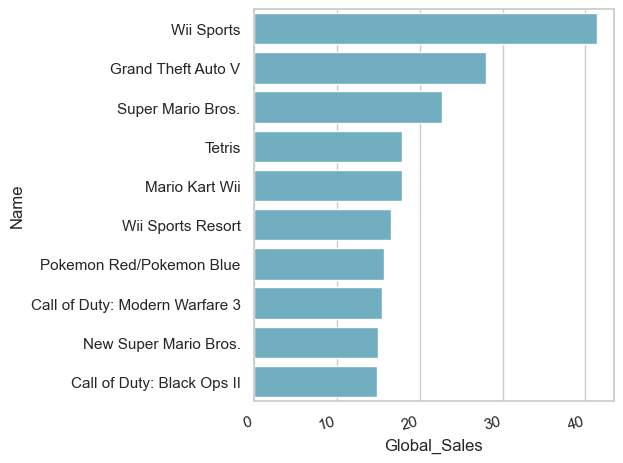

In [117]:
# now we can plot the data in a horizontal bar chart
top10 = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# convert from series back to df
top10 = top10.reset_index()

ax = sns.barplot(top10, x="Global_Sales", y="Name", orient="h", color='c')

ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
plt.tight_layout()
plt.show()

In [118]:
# we can also predict the future global sales of these games using basic linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
y = df['Global_Sales']  # target

features = ['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

X = df[features]

y.head(), X.head()

(0    82.74
 1    40.24
 2    35.82
 3    33.00
 4    31.37
 Name: Global_Sales, dtype: float64,
    Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales
 0     1     41.49     29.02      3.77         8.46
 1     2     29.08      3.58      6.81         0.77
 2     3     15.85     12.88      3.79         3.31
 3     4     15.75     11.01      3.28         2.96
 4     5     11.27      8.89     10.22         1.00)

In [120]:
x_test, x_train, y_test, y_train = train_test_split(X, y, random_state=0)

In [121]:
model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred

array([0.0905223 , 0.42010481, 1.3579984 , ..., 0.12044156, 0.09051801,
       0.73985781])

In [122]:
# evaluate performance
print(f"R² = {r2_score(y_test, pred)}")
print(f"Mean Squared Error = {mean_squared_error(y_test, pred)}")

Mean Squared Error: 2.7096866793707163e-05
R²: 0.9999894577460876


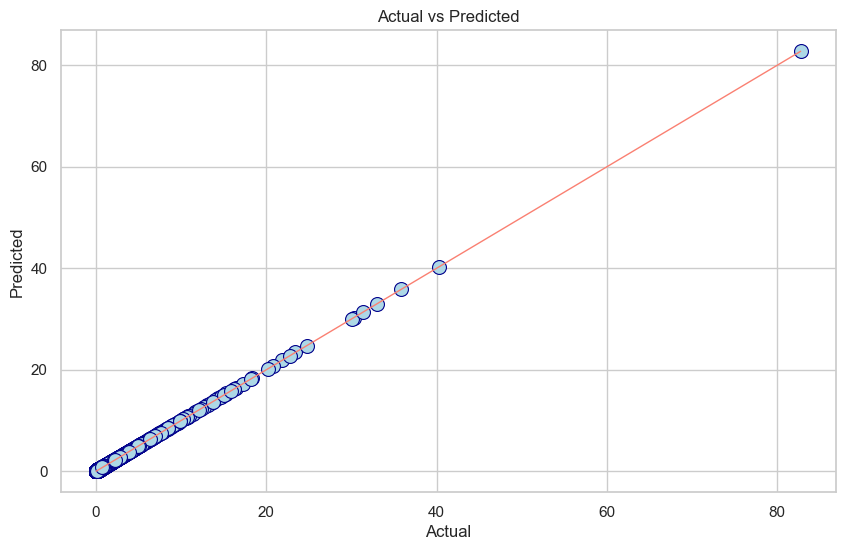

In [123]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred, color='lightblue', s=100, edgecolor='darkblue')

sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='salmon', lw=1)  

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

plt.show()